In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score

In [2]:
data = pd.read_csv("./HMEQ.csv", engine="python")
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [3]:
data.isnull().sum(axis=0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [4]:
data.JOB.fillna("Other",inplace=True)
data.fillna(data.mean(), inplace=True)

In [5]:
data_dummy = pd.get_dummies(data)
data_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [6]:
np.random.seed(seed=1234)
msk = np.random.rand(data_dummy.shape[0]) < 0.7
df_train = data_dummy[msk]
df_test = data_dummy[~msk]

df_train_y = df_train["BAD"]
df_train_x = df_train.drop("BAD",axis=1)

df_test_y = df_test["BAD"]
df_test_x = df_test.drop("BAD",axis=1)

print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))

train data X size: (2604, 18)
train data Y size: (2604,)
test data X size: (1144, 18)
test data Y size: (1144,)


In [7]:
df_train_x_scaled = scale(df_train_x)
df_test_x_scaled = scale(df_test_x)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  


In [8]:
model = ["DecisionTree",'RandomForest','GradientBoosting',"SVM"]

train_accuracy = []
test_accuracy = []

model_f1_score = []

In [9]:
# DecisionTree
tree = DecisionTreeClassifier(criterion="gini",max_depth=10,min_samples_leaf=30,random_state=1234)
tree.fit(df_train_x_scaled,df_train_y)

train_accuracy.append(tree.score(df_train_x_scaled,df_train_y))
test_accuracy.append(tree.score(df_test_x_scaled,df_test_y))

model_f1_score.append(f1_score(df_test_y,tree.predict(df_test_x_scaled)))

In [10]:
# RandomForest
rf = RandomForestClassifier(criterion="gini",n_estimators=500,max_depth=4,min_samples_leaf=30,random_state=1234)
rf.fit(df_train_x_scaled,df_train_y)

train_accuracy.append(rf.score(df_train_x_scaled,df_train_y))
test_accuracy.append(rf.score(df_test_x_scaled,df_test_y))

model_f1_score.append(f1_score(df_test_y,rf.predict(df_test_x_scaled)))

In [11]:
# GradientBoostring
gb = GradientBoostingClassifier(learning_rate=0.1,max_depth=4,min_samples_leaf=30,n_estimators=5,random_state=1234)
gb.fit(df_train_x_scaled,df_train_y)

train_accuracy.append(gb.score(df_train_x_scaled,df_train_y))
test_accuracy.append(gb.score(df_test_x_scaled,df_test_y))

model_f1_score.append(f1_score(df_test_y,gb.predict(df_test_x_scaled)))

In [12]:
# SVM
svm = SVC(C=6,gamma=0.1,random_state=1234)
svm.fit(df_train_x_scaled,df_train_y)

train_accuracy.append(svm.score(df_train_x_scaled,df_train_y))
test_accuracy.append(svm.score(df_test_x_scaled,df_test_y))

model_f1_score.append(f1_score(df_test_y,svm.predict(df_test_x_scaled)))

In [13]:
df_eval = pd.DataFrame(index=model)
df_eval['TrainAccuracy'] = train_accuracy
df_eval['TestAccuracy'] = test_accuracy
df_eval['F1Score'] = model_f1_score
df_eval.round(3)

,TrainAccuracy,TestAccuracy,F1Score
DecisionTree,0.929,0.927,0.420
RandomForest,0.925,0.926,0.298
GradientBoosting,0.922,0.922,0.239
SVM,0.981,0.957,0.692


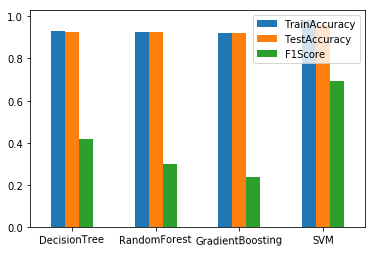

In [19]:
df_eval.plot.bar(rot=1)